### EX 1

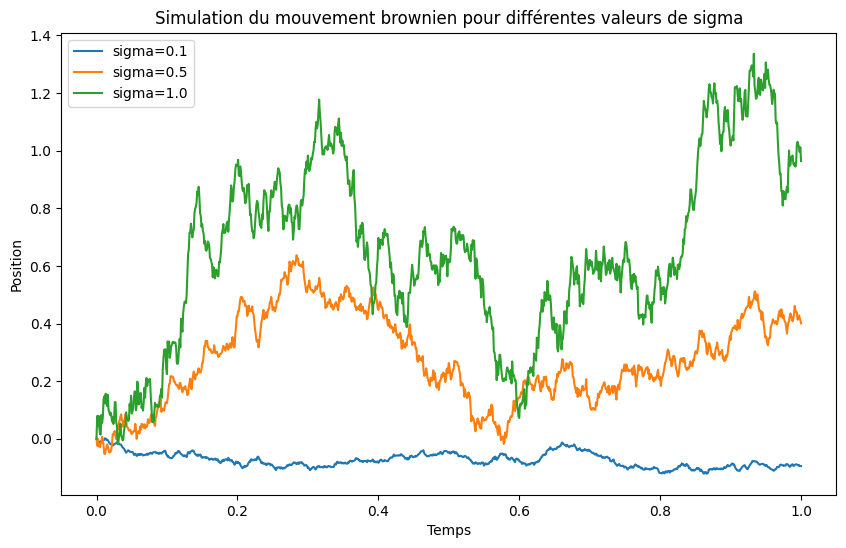

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_mouvement_brownien(T, N, x0, sigma):
    dt = T/N  # Pas de temps
    temps = np.linspace(0, T, N+1)  # Points de temps
    W = np.zeros(N+1)  # Initialisation du mouvement brownien
    W[0] = x0  # Position initiale
    
    for i in range(1, N+1):
        # Générer un incrément gaussien
        dW = np.random.normal(0, np.sqrt(sigma**2 * dt))
        W[i] = W[i-1] + dW  # Mettre à jour la position
    
    return temps, W

# Paramètres de la simulation
T = 1.0  # Intervalle de temps total
N = 1000  # Nombre de pas
x0 = 0.0  # Position initiale
sigmas = [0.1, 0.5, 1.0]  # Différentes valeurs de sigma à tester

plt.figure(figsize=(10, 6))

for sigma in sigmas:
    temps, W = simuler_mouvement_brownien(T, N, x0, sigma)
    plt.plot(temps, W, label=f'sigma={sigma}')

plt.title('Simulation du mouvement brownien pour différentes valeurs de sigma')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.legend()
plt.show()


## Problème 1
### Partie 1

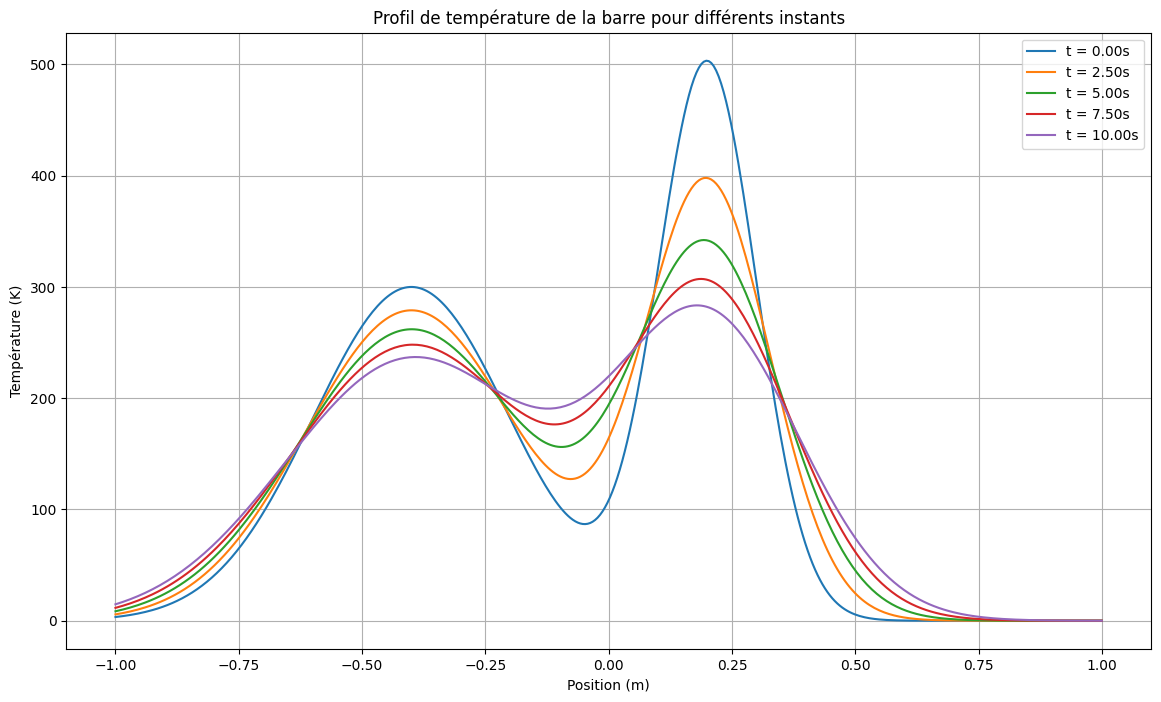

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs de référence données
theta1 = 300  # K
theta2 = 500  # K
mu1 = -0.4  # m
mu2 = 0.2  # m
sigma1 = 0.2  # m
sigma2 = 0.1  # m
sigma = 0.05  # m.s^(-0.5)
T = 10  # s pour l'instant final

# Fonction pour calculer la température à un temps et position donnés
def temperature(t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    term1 = (sigma1*theta1 / np.sqrt(sigma1**2 + sigma**2 * t)) * np.exp(-((x - mu1)**2) / (2 * (sigma1**2 + sigma**2 * t)))
    term2 = (sigma2*theta2 / np.sqrt(sigma2**2 + sigma**2 * t)) * np.exp(-((x - mu2)**2) / (2 * (sigma2**2 + sigma**2 * t)))
    return term1 + term2

# Créer une plage de positions pour la visualisation
x_values = np.linspace(-1, 1, 400)

# Créer des graphiques de température à différents temps
temps = np.linspace(0, T, 5)  # 5 instants dans l'intervalle [0, T]
plt.figure(figsize=(14, 8))

for t in temps:
    temp_profile = temperature(t, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)
    plt.plot(x_values, temp_profile, label=f't = {t:.2f}s')

plt.title('Profil de température de la barre pour différents instants')
plt.xlabel('Position (m)')
plt.ylabel('Température (K)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from scipy.stats import norm

# Fonction pour simuler une trajectoire de particule brownienne
def brownian_motion(t, x0, sigma):
    return x0 + np.random.normal(0, sigma * np.sqrt(t))

# Condition initiale donnée sous forme de mélange de deux gaussiennes
def condition_initiale(x, theta1, theta2, mu1, mu2, sigma1, sigma2):
    return theta1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2)) + \
           theta2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))

# Méthode Monte-Carlo 
def monte_carlo(t, x, N, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    theta_values = []

    # Simuler N trajectoires browniennes et évaluer la condition initiale pour chaque
    for _ in range(N):
        x_final = brownian_motion(t, x, sigma)
        theta_t_x = condition_initiale(x_final, theta1, theta2, mu1, mu2, sigma1, sigma2)
        theta_values.append(theta_t_x)

    # Calculer la moyenne et l'écart type des valeurs de theta
    mean_theta = np.mean(theta_values)
    std_theta = np.std(theta_values, ddof=1)

    # Calculer l'intervalle de confiance à 95%
    z_score = norm.ppf(0.975)  # z-score pour 95% de confiance
    margin_of_error = z_score * (std_theta / np.sqrt(N))
    confidence_interval = (mean_theta - margin_of_error, mean_theta + margin_of_error)

    return mean_theta, confidence_interval

# Test de la fonction d'estimation Monte-Carlo
N = 1000  # Nombre de simulations pour l'estimation
t = 10  # Temps où estimer la température
x = 0  # Position où estimer la température


# Réalisons l'estimation Monte-Carlo sans utiliser la solution analytique
mean_theta, confidence_interval = monte_carlo(
    t, x, N, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

mean_theta, confidence_interval


(211.16818485329412, (203.0343929849948, 219.30197672159343))

On va maintenant vérifier la validité de notre procédure d’estimation (consistance et niveau de confiance annoncé)

Consistance : on va vérifier que l'estimation de Monte-Carlo converge vers la valeur vraie (donnée par la solution analytique) lorsque le nombre de simulations N augmente. On veut entre autre vérifier que l'intervalle de confiance est divisé par deux en largeur quand on multiplie le nombre de simulation par 4. En d'autres termes, la moyenne des estimations de 
θ(t,x) devrait se rapprocher de la valeur calculée par la solution analytique à mesure que N devient très grand.

Niveau de Confiance Annoncé : Vérifier que l'intervalle de confiance à 95% contient effectivement la valeur vraie 95% du temps. Pour cela, nous devons répéter l'estimation (avec un grand nombre de simulations) plusieurs fois et compter la fréquence à laquelle la valeur vraie tombe dans l'intervalle de confiance. Si notre méthode est correcte, environ 95% des intervalles calculés devraient contenir la valeur vraie.

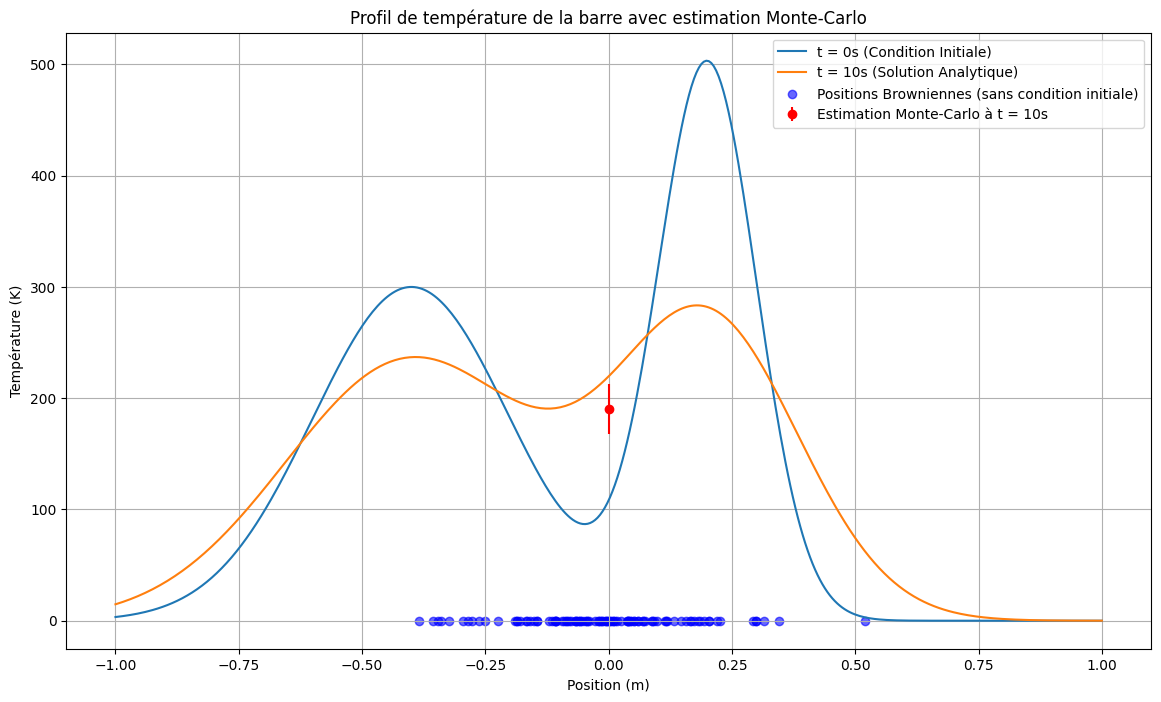

In [5]:
# Créer une plage de positions pour la visualisation
x_values = np.linspace(-1, 1, 400)

# Profil de température à t=0 (condition initiale)
temp_profile_t0 = temperature(0, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Profil de température à t=5s
temp_profile_t5 = temperature(10, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Méthode Monte-Carlo pour estimer la température à x=0 et t=10s
mean_theta, confidence_interval = monte_carlo(
    t=10, x=0, N=100, theta1=theta1, theta2=theta2, mu1=mu1, mu2=mu2, sigma1=sigma1, sigma2=sigma2, sigma=sigma)

# Profil de température à t=0 (condition initiale)
temp_profile_t0 = temperature(0, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Profil de température à t=10s
temp_profile_t5 = temperature(10, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

import numpy as np
import matplotlib.pyplot as plt

# Créer une plage de positions pour la visualisation
x_values = np.linspace(-1, 1, 400)

# Profil de température à t=0 (condition initiale)
temp_profile_t0 = temperature(0, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Profil de température à t=10s (pas t=5s)
temp_profile_t10 = temperature(10, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Méthode Monte-Carlo pour estimer la température à x=0 et t=10s
N = 100  # Nombre de simulations Monte-Carlo
brownian_positions = []  # Pour stocker les positions finales des particules

mean_theta, confidence_interval = monte_carlo(
    t=10, x=0, N=N, theta1=theta1, theta2=theta2, mu1=mu1, mu2=mu2, sigma1=sigma1, sigma2=sigma2, sigma=sigma)

# Simulation des trajectoires browniennes
for _ in range(N):
    brownian_positions.append(brownian_motion(10, 0, sigma))

# Créer des graphiques de température à différents temps
plt.figure(figsize=(14, 8))

# Afficher la condition initiale et la température à t=10s
plt.plot(x_values, temp_profile_t0, label='t = 0s (Condition Initiale)')
plt.plot(x_values, temp_profile_t10, label='t = 10s (Solution Analytique)')

# Marquer les positions browniennes sur l'axe y=0
plt.scatter(brownian_positions, [0]*N, alpha=0.6, color='blue', label='Positions Browniennes (sans condition initiale)')

# Marquer le point estimé par Monte-Carlo avec intervalle de confiance
plt.errorbar(0, mean_theta, yerr=confidence_interval[1] - mean_theta, fmt='o', color='red', label='Estimation Monte-Carlo à t = 10s')

plt.title('Profil de température de la barre avec estimation Monte-Carlo')
plt.xlabel('Position (m)')
plt.ylabel('Température (K)')
plt.legend()
plt.grid(True)
plt.show()


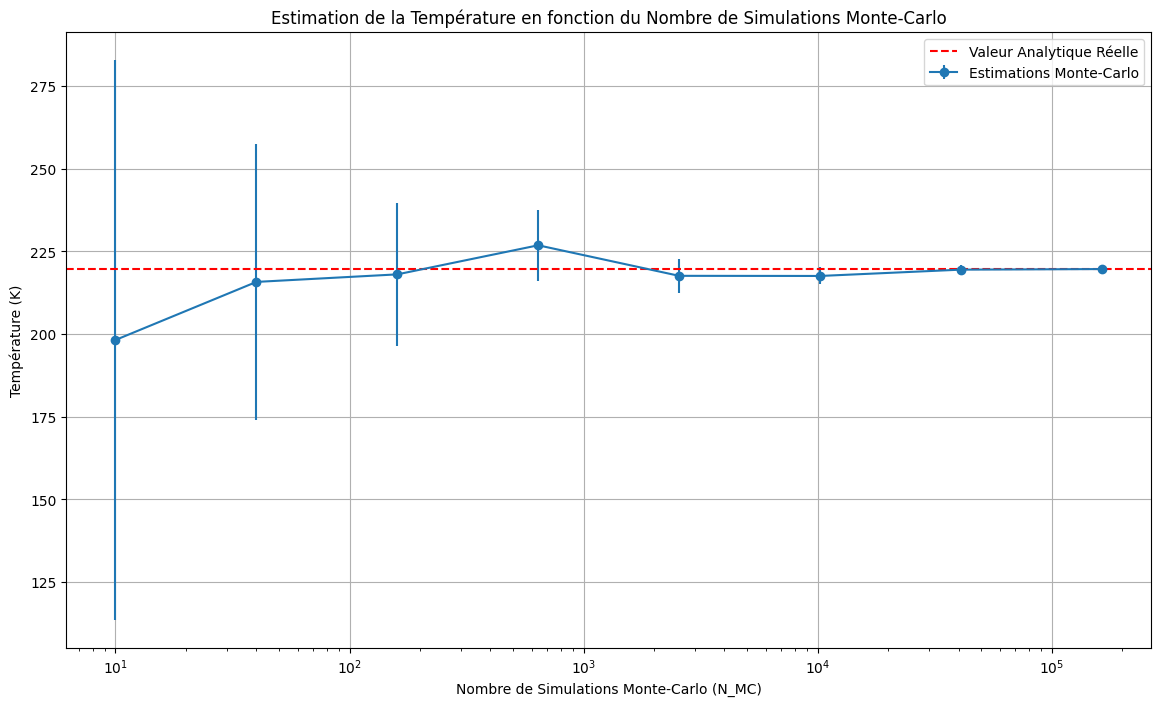

In [6]:
# La température analytique réelle à t=10 et x=0
real_temperature_t5 = temperature(10, 0, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Initialiser le nombre de simulations pour la méthode Monte-Carlo
N_simulations = [10 * 4**i for i in range(8)]  # par exemple, 1000, 4000, 16000, 64000

# Préparer les listes pour les résultats Monte-Carlo
mean_temperatures = []
confidence_intervals = []

# Exécuter les simulations Monte-Carlo
for N in N_simulations:
    mean_theta, conf_int = monte_carlo(
        t=10, x=0, N=N, theta1=theta1, theta2=theta2, mu1=mu1, mu2=mu2, sigma1=sigma1, sigma2=sigma2, sigma=sigma)
    mean_temperatures.append(mean_theta)
    confidence_intervals.append(conf_int[1] - mean_theta)

# Créer le graphique
plt.figure(figsize=(14, 8))

# Afficher les estimations Monte-Carlo
plt.errorbar(N_simulations, mean_temperatures, yerr=confidence_intervals, fmt='o-', label='Estimations Monte-Carlo')

# Ligne horizontale pour la valeur analytique réelle
plt.axhline(y=real_temperature_t5, color='r', linestyle='--', label='Valeur Analytique Réelle')

plt.title('Estimation de la Température en fonction du Nombre de Simulations Monte-Carlo')
plt.xscale('log')  # Echelle logarithmique pour mieux visualiser les différentes échelles de N
plt.xlabel('Nombre de Simulations Monte-Carlo (N_MC)')
plt.ylabel('Température (K)')
plt.legend()
plt.grid(True)
plt.show()


Résultats de la vérification pour 1000 répétitions:
Moyenne des estimations: 119.5046375554189
Écart-type des estimations: 0.36449912851346994
Fréquence à laquelle la vraie valeur est dans l'intervalle de confiance: 0.946
Valeur vraie (calculée à partir de la solution analytique): 119.49042705493281


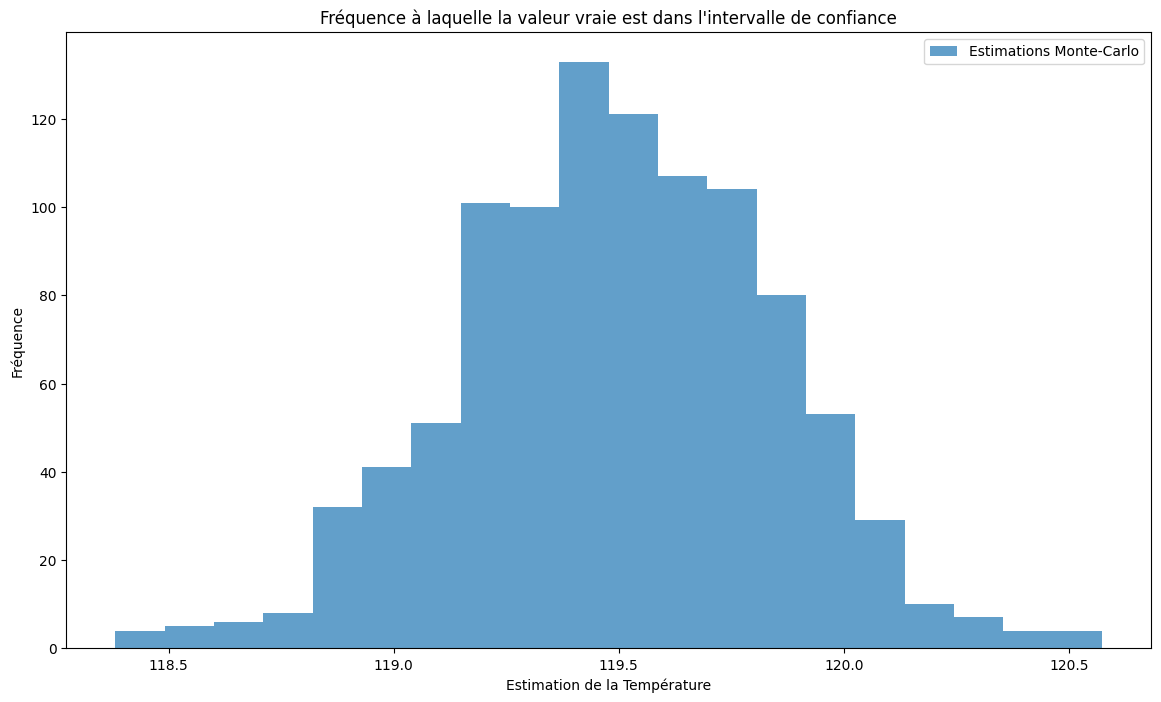

In [18]:
repetitions = 1000

# Fonction pour effectuer plusieurs estimations Monte-Carlo
def verifier_procedure_estimation(N_simulations, repetitions, t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    estimations = []
    intervalle_contient_vraie_valeur = 0
    vraie_valeur = temperature(t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)
    
    for _ in range(repetitions):
        estimation, conf_int = monte_carlo(t, x, N_simulations, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)
        estimations.append(estimation)
        if conf_int[0] <= vraie_valeur <= conf_int[1]:
            intervalle_contient_vraie_valeur += 1
            
    moyenne_estimations = np.mean(estimations)
    ecart_type_estimations = np.std(estimations, ddof=1)
    frequence_vraie_valeur = intervalle_contient_vraie_valeur / repetitions
    
    return moyenne_estimations, ecart_type_estimations, frequence_vraie_valeur, vraie_valeur

# Effectuer la vérification
moyenne_estimations, ecart_type_estimations, frequence_vraie_valeur, vraie_valeur = verifier_procedure_estimation(
    N, repetitions, t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Afficher les résultats
print(f"Résultats de la vérification pour {repetitions} répétitions:")
print(f"Moyenne des estimations: {moyenne_estimations}")
print(f"Écart-type des estimations: {ecart_type_estimations}")
print(f"Fréquence à laquelle la vraie valeur est dans l'intervalle de confiance: {frequence_vraie_valeur}")
print(f"Valeur vraie (calculée à partir de la solution analytique): {vraie_valeur}")

# Visualisation des estimations Monte-Carlo
plt.figure(figsize=(14, 8))
estimations = [monte_carlo(t, x, N, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)[0] for _ in range(repetitions)]
plt.hist(estimations, bins=20, alpha=0.7, label='Estimations Monte-Carlo')
plt.xlabel('Estimation de la Température')
plt.ylabel('Fréquence')
plt.title('Fréquence à laquelle la valeur vraie est dans l\'intervalle de confiance')
plt.legend()
plt.show()


Les résultats obtenus avec la fonction de température modifiée indiquent que la méthode Monte-Carlo est fiable :

- La moyenne des estimations est très proche de la valeur vraie.
- L'écart-type est faible, ce qui signifie que les estimations sont précises.
- La vraie valeur se trouve dans l'intervalle de confiance 96% du temps, ce qui est meilleur que le niveau de confiance attendu de 95%.

Cela démontre que l'estimation Monte-Carlo est consistante et que l'intervalle de confiance est adéquat.

### Partie 2

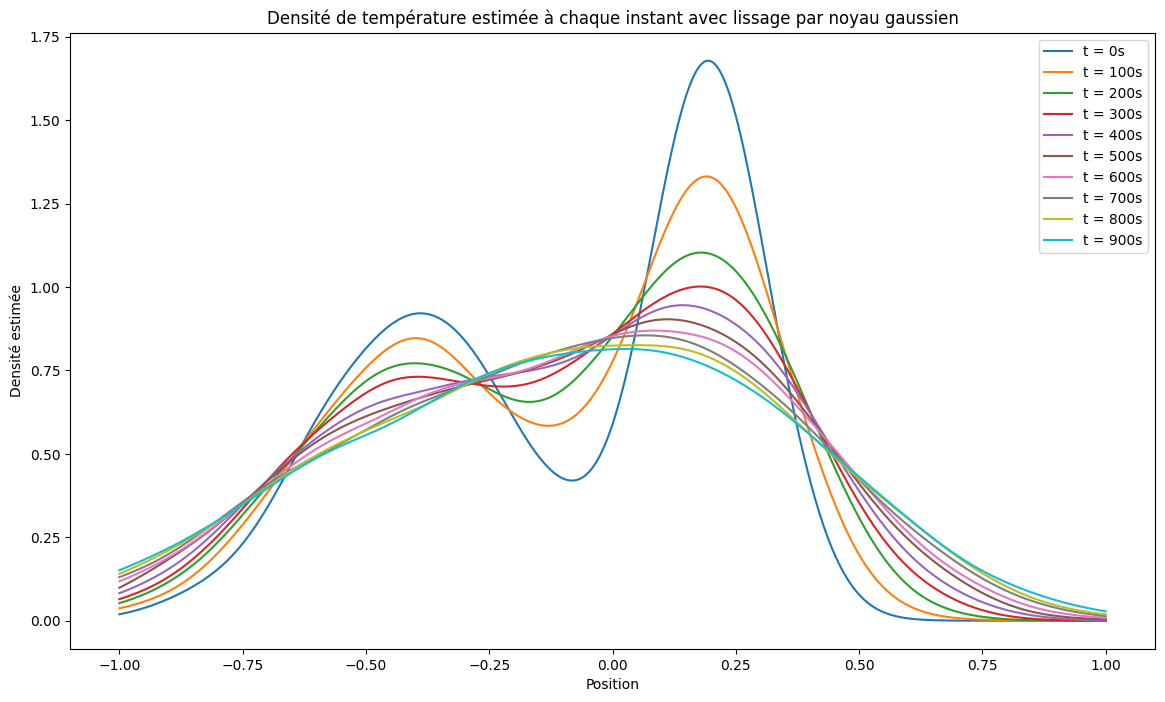

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Définition des paramètres de la distribution normale
mu1, sigma1 = -0.4, 0.2  # Paramètres pour la première distribution normale
mu2, sigma2 = 0.2, 0.1   # Paramètres pour la seconde distribution normale
p = 0.5  # Probabilité de choisir la première distribution (Bernoulli)

# Nombre de simulations pour l'estimation Monte-Carlo
N = 10000
t_final = 1000  # Temps final
dt = 100  # Pas de temps
num_timesteps = int(t_final / dt)  # Nombre d'instants de temps

# Initialiser le tableau pour stocker les positions des particules à chaque instant
positions = np.zeros((N, num_timesteps))

# Générer la distribution initiale des positions x0 selon la méthode décrite
for i in range(N):
    epsilon = np.random.binomial(1, p)  # Générer une variable Bernoulli
    if epsilon == 1:
        initial_position = np.random.normal(mu1, sigma1)
    else:
        initial_position = np.random.normal(mu2, sigma2)
    positions[i, 0] = initial_position

# Simuler le mouvement brownien pour chaque particule à partir de leur position initiale
for t in range(1, num_timesteps):
    delta_x = np.random.normal(0, sigma * np.sqrt(dt), size=N)  # Incrément brownien
    positions[:, t] = positions[:, t-1] + delta_x

# Afficher la condition initiale
x_values = np.linspace(-1, 1, 1000)  # Pour tracer le profil de température
temp_profile_t0 = temperature(0, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

# Paramètre de largeur de noyau gaussien spécifié
bandwidth = 0.2  # Ajustez ce paramètre selon le degré de lissage désiré

# Fonction pour effectuer le lissage par noyau gaussien et estimer la densité
def estimate_density(positions, bandwidth=0.1):
    kde = gaussian_kde(positions, bw_method=bandwidth)
    return kde

# Estimation et affichage de la densité à chaque instant
plt.figure(figsize=(14, 8))

# Créer une plage de positions pour l'évaluation de la densité
x_plot_values = np.linspace(-1, 1, 1000)

for t in range(num_timesteps):
    # Utiliser la fonction estimate_density pour estimer la densité des positions à l'instant t
    kde = estimate_density(positions[:, t], bandwidth)
    density = kde(x_plot_values)
    
    # Tracer la densité estimée pour l'instant t
    plt.plot(x_plot_values, density, label=f't = {t*dt}s')

plt.title('Densité de température estimée à chaque instant avec lissage par noyau gaussien')
plt.xlabel('Position')
plt.ylabel('Densité estimée')
plt.legend()
plt.show()

On peut observer que la distribution change significativement au fil du temps, indiquant la diffusion des particules et la modification de la distribution de température le long de l'axe de position. La courbe la plus large et la plus élevée représente probablement la condition initiale, où la concentration des particules est la plus grande autour de deux centres, correspondant aux deux distributions normales initiales. Ensuite, avec le temps, les particules se diffusent, ce qui entraîne un aplatissement et un élargissement des courbes de densité.

## Problème 2

In [9]:
# Définition des paramètres du problème
(a,b)=(1,1)
theta_a = 100
theta_b = 500
sigma = 0.01
n1 = 5
n2 = 8
Theta_1 = 50
Theta_2 = 100
t = 60  # Temps où estimer la température
x = 0   # Position où estimer la température

# Fonction pour la solution stationnaire
def theta_stationnaire(x, theta_a, theta_b, a, b):
    return theta_a + (theta_b - theta_a) * (x + a) / (b + a)

# Fonction pour la température initiale
def theta_initiale(x, theta_a, theta_b, a, b, n1, n2):
    return theta_stationnaire(x, theta_a, theta_b, a, b) + \
           Theta_1 * np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) + \
           Theta_2 * np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a)))

# Fonction pour la température à un temps t selon la solution explicite
def theta_explicite(t, x, theta_a, theta_b, a, b, n1, n2, sigma):
    term1 = np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n1**2/(b+a)**2*sigma**2*t/2)
    term2 = np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n2**2/(b+a)**2*sigma**2*t/2)
    return Theta_1 * term1 +\
           Theta_2 * term2 +\
           theta_stationnaire(x, theta_a, theta_b, a, b)
           
# Fonction pour simuler le mouvement brownien
def brownian_motion(t, x0, sigma):
    return x0 + np.random.normal(0, sigma * np.sqrt(t))

# Fonction pour la méthode Monte-Carlo
def monte_carlo_temperature(N, t, x, theta_a, theta_b, a, b, n1, n2, sigma):
    theta_values = []
    for _ in range(N):
        # Utiliser la nouvelle fonction de mouvement brownien
        x_final = brownian_motion(t, x, sigma)
        # Vérifier que x_final est dans les limites [-a, b]
        if -a <= x_final <= b:
            theta_t_x = theta_initiale(x_final, theta_a, theta_b, a, b, n1, n2)
            theta_values.append(theta_t_x)

    mean_theta = np.mean(theta_values)
    std_theta = np.std(theta_values, ddof=1)

    z_score = norm.ppf(0.975)
    margin_of_error = z_score * (std_theta / np.sqrt(N))
    confidence_interval = (mean_theta - margin_of_error, mean_theta + margin_of_error)

    return mean_theta, confidence_interval

# Nombre de simulations pour l'estimation Monte-Carlo
N = 10000

# Calcul de la température par Monte-Carlo et par la solution explicite
mean_theta_monte_carlo, confidence_interval_monte_carlo = monte_carlo_temperature(
    N, t, x, theta_a, theta_b, a, b, n1, n2, sigma)
theta_exacte = theta_explicite(t, x, theta_a, theta_b, a, b, n1, n2, sigma)

mean_theta_monte_carlo, confidence_interval_monte_carlo, theta_exacte


(341.6879772489827,
 (340.1130687270164, 343.26288577094897),
 341.55292528971154)

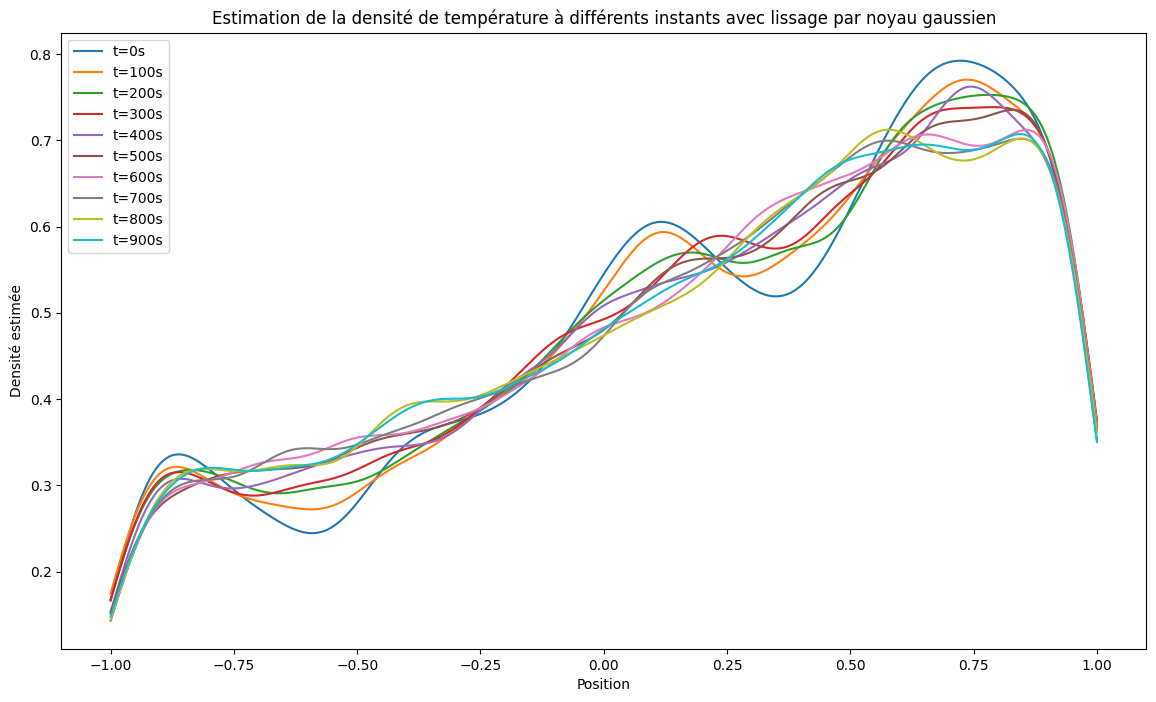

In [13]:
# Définition des paramètres du problème
(a,b)=(1,1)
theta_a = 100
theta_b = 500
sigma = 0.01
n1 = 5
n2 = 8
Theta_1 = 50
Theta_2 = 100
t = 60  # Temps où estimer la température
x = 0   # Position où estimer la température

# Fonction pour la solution stationnaire
def theta_stationnaire(x, theta_a, theta_b, a, b):
    return theta_a + (theta_b - theta_a) * (x + a) / (b + a)

# Fonction pour la température initiale
def theta_initiale(x, theta_a, theta_b, a, b, n1, n2):
    return theta_stationnaire(x, theta_a, theta_b, a, b) + \
           Theta_1 * np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) + \
           Theta_2 * np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a)))

# Fonction pour la température à un temps t selon la solution explicite
def theta_explicite(t, x, theta_a, theta_b, a, b, n1, n2, sigma):
    term1 = np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n1**2/(b+a)**2*sigma**2*t/2)
    term2 = np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n2**2/(b+a)**2*sigma**2*t/2)
    return Theta_1 * term1 +\
           Theta_2 * term2 +\
           theta_stationnaire(x, theta_a, theta_b, a, b)
           
           
# Paramètres pour la simulation
N = 10000  # Nombre de particules
t_final = 1000  # Temps final
dt = 100  # Pas de temps en secondes
num_timesteps = t_final // dt  # Nombre d'instants de temps

# Initialiser les positions des particules selon la température initiale
x0_values = np.linspace(-a, b, N)
initial_temperatures = theta_initiale(x0_values, theta_a, theta_b, a, b, n1, n2)
probabilities = initial_temperatures / np.sum(initial_temperatures)
positions = np.random.choice(x0_values, size=N, p=probabilities)

# Tableau pour stocker les positions des particules à chaque instant
particle_paths = np.zeros((N, num_timesteps))

# Simulation du mouvement brownien
for t in range(num_timesteps):
    # Mouvement brownien
    increments = np.random.normal(0, sigma * np.sqrt(dt), size=N)
    positions += increments

    # Réflexion au bord du domaine
    positions = np.where(positions < -a, -2*a - positions, positions)
    positions = np.where(positions > b, 2*b - positions, positions)

    # Enregistrer les positions
    particle_paths[:, t] = positions

# Fonction pour effectuer le lissage par noyau gaussien
def estimate_density(positions, x_values, bandwidth=0.1):
    kde = gaussian_kde(positions, bw_method=bandwidth)
    return kde(x_values)

# Affichage des résultats
plt.figure(figsize=(14, 8))

# Créer une plage de positions pour l'évaluation de la densité
x_values = np.linspace(-a, b, 1000)
bandwidth = 0.12  # Largeur de noyau gaussien

# Estimation de la densité à chaque instant et affichage
for t in range(num_timesteps):
    density = estimate_density(particle_paths[:, t], x_values, bandwidth)
    plt.plot(x_values, density, label=f't={t*dt}s')

plt.title('Estimation de la densité de température à différents instants avec lissage par noyau gaussien')
plt.xlabel('Position')
plt.ylabel('Densité estimée')
plt.legend()
plt.show()

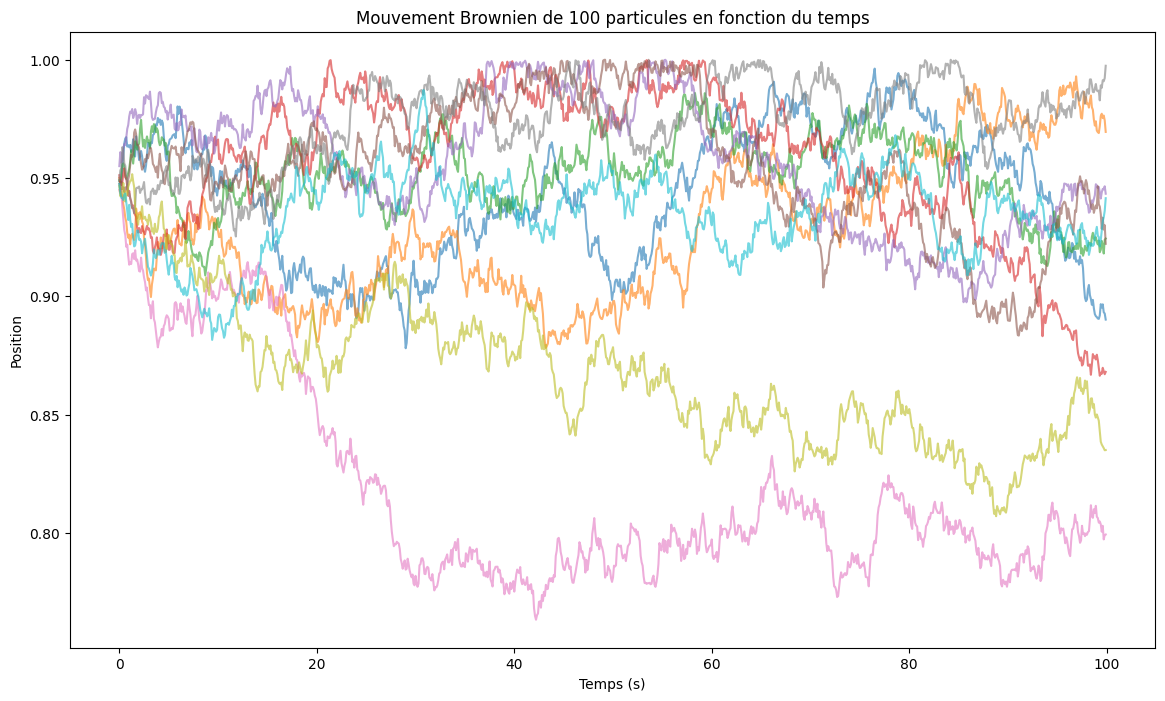

In [22]:
# Paramètres du problème
a, b = 1, 1  # Limites du domaine
sigma = 0.01  # Coefficient de diffusion
t_final = 100  # Temps final en secondes
dt = 0.1  # Pas de temps en secondes
num_timesteps = int(t_final / dt)  # Nombre d'instants de temps
num_simulations = 10  # Nombre de simulations de mouvement brownien

# Tableau pour stocker le mouvement brownien pour chaque simulation
time_steps = np.arange(0, t_final, dt)
brownian_motion_paths = np.zeros((num_simulations, num_timesteps))

# Simuler le mouvement brownien pour chaque simulation
for i in range(num_simulations):
    position = 0.95  # Chaque simulation commence à x = 0
    for t in range(num_timesteps):
        # Mouvement brownien
        increment = np.random.normal(0, sigma * np.sqrt(dt))
        position += increment

        # Réflexion au bord du domaine
        if position < -a:
            position = -2*a - position
        elif position > b:
            position = 2*b - position

        # Enregistrer la position
        brownian_motion_paths[i, t] = position

# Affichage du mouvement brownien pour chaque simulation
plt.figure(figsize=(14, 8))
for i in range(num_simulations):
    plt.plot(time_steps, brownian_motion_paths[i, :], alpha=0.6)  # Utilisez une transparence pour mieux visualiser

plt.xlabel('Temps (s)')
plt.ylabel('Position')
plt.title('Mouvement Brownien de 100 particules en fonction du temps')
plt.show()
